In [4]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 2.1 MB/s eta 0:03:00
   ---------------------------------------- 0.8/376.0 MB 1.9 MB/s eta 0:03:22
   ---------------------------------------- 1.3/376.0 MB 1.9 MB/s eta 0:03:16
   ---------------------------------------- 1.6/376.0 MB 1.8 MB/s eta 0:03:26
   ---------------------------------------- 2.1/376.0 MB 2.0 MB/s eta 0:03:08
   ---------------------------------------- 2.6/376.0 MB 2.1 MB/s eta 0:02:56
   ---------------------------------------- 3.4/376.0 MB 2.3 MB/s eta 0:02:45
   ---------------------------------------- 3.9/376.0 MB 2.3 MB/s eta 0:02:40
   ---------------------------------------- 4.5/376.0 MB 2.3 MB/s eta 0:02:41
    --------------------------------------- 5.0/376.0 MB 2.3 MB/s eta 0:02:39
    --------------------------------------- 5.8/376.0 MB 2.5 MB/s eta 0:02:30


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [13]:
base_dir = 'D:/ML DATASET/archive/Plants_2'

train_dir = base_dir + '/train'
valid_dir = base_dir + '/valid'
test_dir = base_dir + '/test'

# Parameters
img_size = (224, 224)
batch_size = 32

In [14]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

class_names = train_ds.class_names
print(f"Classes: {class_names}")


Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Classes: ['Alstonia Scholaris diseased (P2a)', 'Alstonia Scholaris healthy (P2b)', 'Arjun diseased (P1a)', 'Arjun healthy (P1b)', 'Bael diseased (P4b)', 'Basil healthy (P8)', 'Chinar diseased (P11b)', 'Chinar healthy (P11a)', 'Gauva diseased (P3b)', 'Gauva healthy (P3a)', 'Jamun diseased (P5b)', 'Jamun healthy (P5a)', 'Jatropha diseased (P6b)', 'Jatropha healthy (P6a)', 'Lemon diseased (P10b)', 'Lemon healthy (P10a)', 'Mango diseased (P0b)', 'Mango healthy (P0a)', 'Pomegranate diseased (P9b)', 'Pomegranate healthy (P9a)', 'Pongamia Pinnata diseased (P7b)', 'Pongamia Pinnata healthy (P7a)']


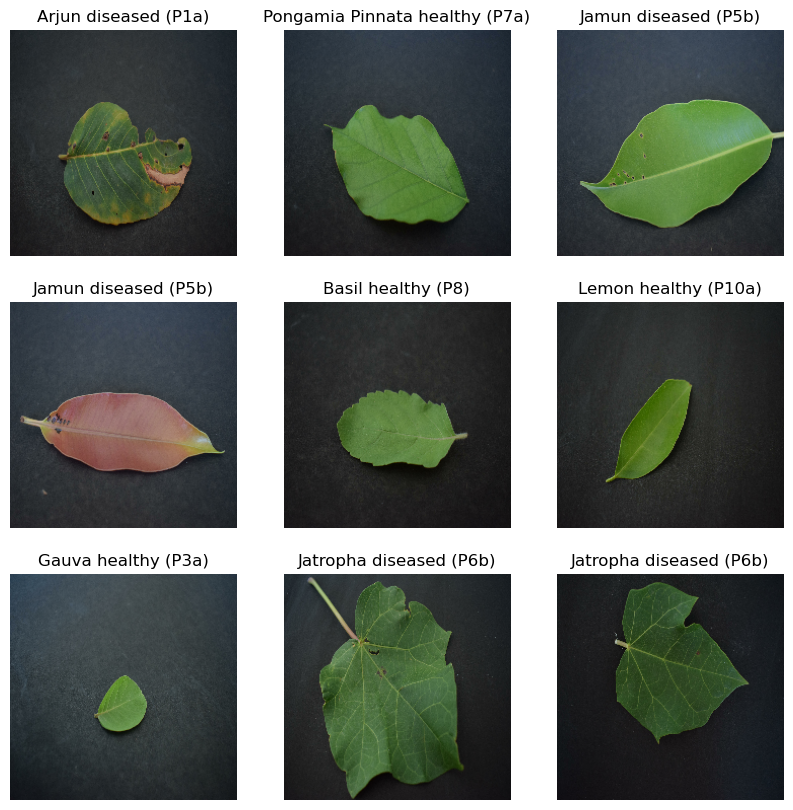

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [16]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

def preprocess(image, label):
    image = mobilenet_preprocess(image)
    return image, label

train_ds = train_ds.map(preprocess)
valid_ds = valid_ds.map(preprocess)
test_ds = test_ds.map(preprocess)


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [18]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers initially

inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)
model = models.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 22)                  │          28,182 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,286,166 (8.72 MB)

 Trainable params: 28,182 (110.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=5
)


Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.4765 - loss: 1.8774 - val_accuracy: 0.7636 - val_loss: 0.7840
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8485 - loss: 0.5610 - val_accuracy: 0.7909 - val_loss: 0.5994
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8982 - loss: 0.3889 - val_accuracy: 0.8364 - val_loss: 0.5266
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9300 - loss: 0.2959 - val_accuracy: 0.8273 - val_loss: 0.4879
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9439 - loss: 0.2377 - val_accuracy: 0.8364 - val_loss: 0.4680


In [20]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 920ms/step - accuracy: 0.8507 - loss: 0.4670
Test Accuracy: 0.86


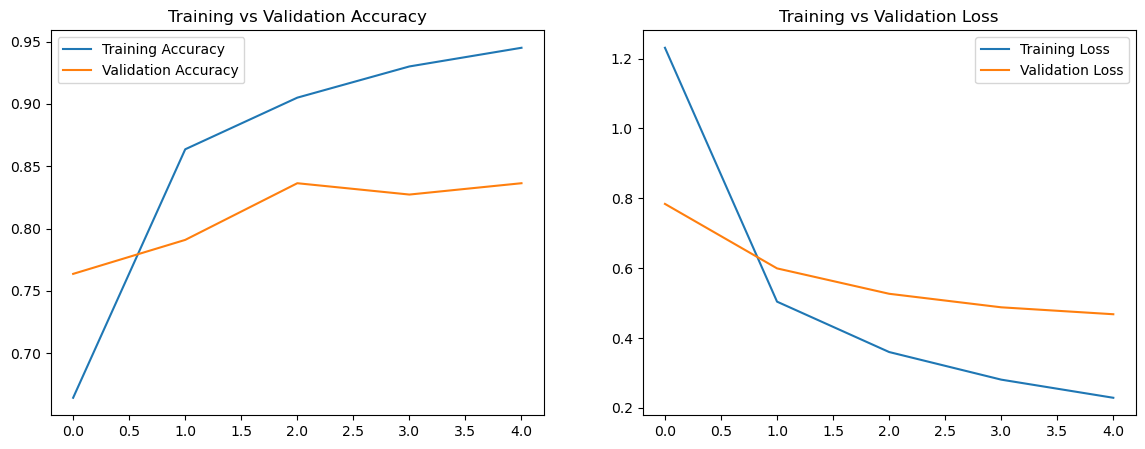

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


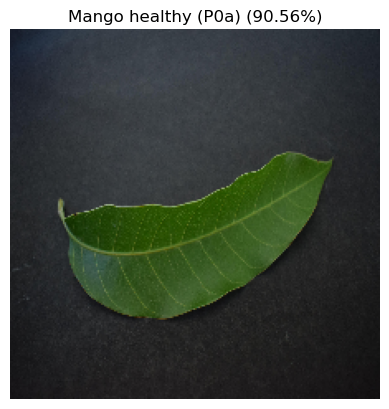

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = mobilenet_preprocess(img_array)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    plt.imshow(img)
    plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage:
predict_image(r'D:\ML DATASET\archive\Plants_2\images to predict\0001_0170.jpg')


In [27]:
# step nine. FINETUNING : image classification setup. 
